# <center>Laboratorium 10<br>Metody Numeryczne</center>

Instrukcja:  
Na zajęciach należy wykonać poniższe zadania, uzupełnić plik main.py, wykonać test na platformie github, a następnie sporządzić sprawozdanie zawierające odpowiedzi z komentarzami.

***Materiały przygotowujące:***


In [1]:
import main
import numpy as np
import scipy
import matplotlib
import matplotlib.pyplot as plt
import scipy.linalg
from numpy.polynomial import polynomial as P

**Cel zajęć:** Celem zajęć jest zapoznanie się z numerycznymi metodami rozwiązywania równań nieliniowych lub inaczej mówiąc metodami znajdowania miejsc zerowych funkcji.
W związku z tym podczas zajęć będziemy rozważać następujący problem:

Dana jest funkcja $f(x)$, należy wyznaczyć argumenty funkcji $x$, dla których $f(x) = 0$ (funkcja jest równa zero). 

Argumenty $x^*$, dla których $f(x^*$)=0$ nazywamy *pierwiastkami*.

***Zadanie 1.***  
Dany jest wielomian postaci $W(x)=(x-1)(x-2)\cdot \ldots \cdot (x-20)$.

1. Zdefinuj funkcję *polly_A*, która obliczy współczynniki wielomianu $a_i$ w postaci ogólnej wielomianu $w(x)=a_nx^n+\ldots +a_2x^2+a_1x+1$. Skonstruuj wektor tych współczynników. Użyj funkcji [polyfromroots](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.polynomial.polynomial.polyfromroots.html#numpy.polynomial.polynomial.polyfromroots) oraz *linspace*.
2. Zdefinuj funkcję *roots_20*, która w pętli 20 iteracji będzie:  

   i. konstruować wektor współczynników nowego wielomianu w następujący sposób: do każdego wygenerowanego wektora współczynników dodać losową wartość w postaci $(10^{-10})N(0,1)$. Użyj funkcji [random_sample](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.random_sample.html#numpy.random.random_sample).  
  ii. wyliczyać pierwiaski tego wielomianu za pomocą metody [polyroots](https://docs.scipy.org/doc/numpy/reference/generated/numpy.polynomial.polynomial.polyroots.html#numpy.polynomial.polynomial.polyroots).

3. Narysuj na wykresie te pierwiastki (w każdej iteracji dorysowywać pierwiastki na tym samym rysunku).
4. Określić, który pierwiastek jest najbardziej wrażliwy na zaburzenia.
5. Zaproponować sposób oszacowania uwarunkowania każdego z pierwiastków.

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


Text(0.5, 0, 'Wejściowe pierwiastki')

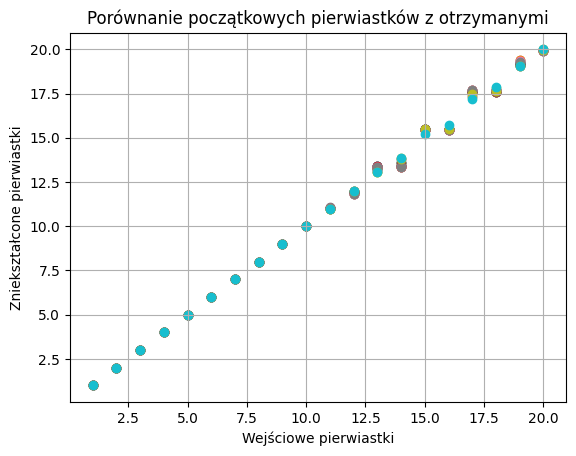

In [2]:
#określam wielomian:
wielomian = np.arange(1, 21)
print(wielomian)
wsp = main.polly_A(wielomian)    
for i in range(20):
    a, b = main.roots_20(wsp)
    plt.scatter(wielomian, np.sort(np.absolute(b)))
plt.title('Porównanie początkowych pierwiastków z otrzymanymi')
plt.grid(True)
plt.ylabel('Zniekształcone pierwiastki')
plt.xlabel('Wejściowe pierwiastki')




Im większy jest pierwiastek tym większa podatność na zniekształcenia. 

***Zadanie 2.***  
Dany jest wielomian $w_1(x)=(x-1)^8$. Wyznacz numerycznie miejsca zerowego tego wielomianu poprzez wyznaczenie wartości własnych macierzy Frobeniusa. W związku z tym wykonaj następujące czynności:  

1. Zaiplementuj funkcję tworzącą [macierz Frobeniusa](https://github.com/KAIR-ISZ/public_lectures/blob/master/Metody%20Numeryczne%202019/Lecture%204%20(nonlinear%20equations)/Metody%20numeryczne%202019%20-%20R%C3%B3wnania%20nieliniowe.pdf) *frob_a*, dla zadanego wektora współczynników wielomianu $w(x)$.  
2. Wyznacz wartości własne przekształconej macierzy za pomocą funkcji [eigvals](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.eigvals.html#numpy.linalg.eigvals).  
3. Dokonaj rozkładu Schura macierzy zdefiniowanej w punkcie 1. użyj funkcji [schure](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.linalg.schur.html#scipy.linalg.schur).  
4. Porównaj wyniki z funkcją polyroots.

In [19]:
def frob_f(wsp: np.ndarray):
    if not isinstance(wsp,np.ndarray):
        return None
    
    try:
        frob = np.diag(np.ones(len(wsp) - 2), 1)
        wsp = -1 * wsp /wsp[0] 
        wsp = wsp[1:] 
        wsp = wsp[::-1] 
        frob[len(wsp) - 1] = wsp
        return frob
    
    except: 
        return None
    

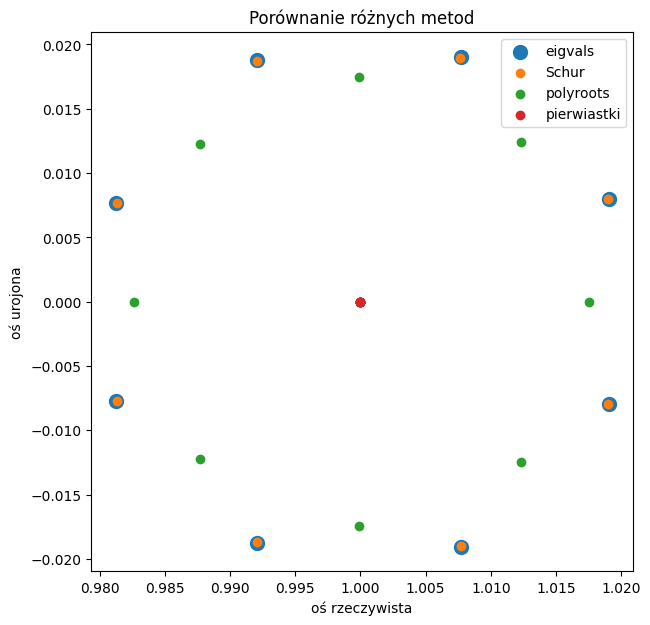

In [20]:
polyRoots = np.ones(8)
polyCoeff = P.polyfromroots(polyRoots)    
frob = frob_f(polyCoeff[::-1])       
# print(frob)
eigenVals = np.linalg.eigvals(frob)
T, _ = scipy.linalg.schur(frob, output='complex')
shurEigvals = np.diagonal(T)
polyRoots2 = P.polyroots(polyCoeff)

plt.figure(figsize=(7,7))
plt.scatter(np.real(eigenVals), np.imag(eigenVals),s=100, label='eigvals')
plt.scatter(np.real(shurEigvals), np.imag(shurEigvals), label='Schur')
plt.scatter(np.real(polyRoots2), np.imag(polyRoots2), label='polyroots')
plt.scatter(np.real(polyRoots), np.imag(polyRoots), label='pierwiastki')
plt.title('Porównanie różnych metod')
plt.xlabel('oś rzeczywista')
plt.ylabel('oś urojona')
plt.legend()


***Zadanie 3.***  
Dla danego wielomianu $w_2(x) = 243x^7-486x^6+783x^5-990x^4+558x^3-28x^2-72x+16$ wyznacz miejsca zerowe numerycznie, w taki sam sposób jak w zadaniu 2.


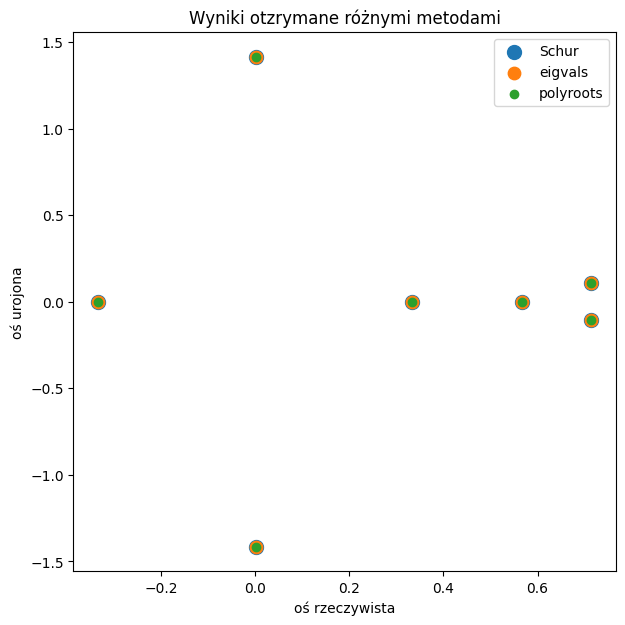

In [14]:
wielomian = np.array([243,-486,785,-990,558,-28,-72,16])

polyRoots = P.polyroots(wielomian[::-1])    #[an, an-1,...,a1,a0] trzeba zamienic na [a0,a1,...,an]
frob = frob_f(wielomian)
eigenVals = np.linalg.eigvals(frob)
T, _ = scipy.linalg.schur(frob, output='complex')
shurEigvals = np.diagonal(T)

plt.figure(figsize=(7,7))
plt.scatter(np.real(shurEigvals), np.imag(shurEigvals),s=100,label='Schur')
plt.scatter(np.real(eigenVals), np.imag(eigenVals),s=80, label='eigvals')
plt.scatter(np.real(polyRoots), np.imag(polyRoots), label='polyroots')
plt.title('Wyniki otzrymane różnymi metodami')
plt.xlabel('oś rzeczywista')
plt.ylabel('oś urojona')
plt.legend()


Wszystkie wyniki pokrywają się, więc metody działają!


***Zadanie 4.***

Skonstruuj macierz diagonalną $\mathbf{A}_n$ (użyj do tego funkcji [_diag_](https://numpy.org/doc/stable/reference/generated/numpy.diag.html)) której współczynniki $x_i = 2^i$ dla $i = \{1,2,...,n\}$ gdzie $n = \{10,20,30\}$.

1. Dla wszystkich macierzy $\mathbf{A}_n$ oblicz ich wartości własne przy użyciu [eigvals](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.eigvals.html#numpy.linalg.eigvals) i porównaj je z analitycznymi wartościami własnymi.
2. Zdefiniuj funcję _main.is_nonsingular_. Przy pomocy tej funkcji skonstruuj losowe macierze wektorów własnych $\mathbf{P}_n$ których wartości współczynników będą liczbami całkowitymi z zakresu (0,100). Na podstawie macierzy $\mathbf{A}_n$ i $\mathbf{P}_n$ oblicz macierze: $$\mathbf{B}_n = \mathbf{P}_n\mathbf{A}_n\mathbf{P}_{n}^{-1}$$ Oblicz wartości własne dla uzyskanych macierzy i porównaj je z analitycznymi wartościami własnymi.
3. Bazując na macierzach $\mathbf{P}_n$ wygeneruj macierze ortonormalne $\mathbf{Q}_n$ (można do tego użyć rozkładu QR). Na podstawie macierzy $\mathbf{Q}_n$ oblicz macierze $\mathbf{C}_n$ w sposób analogiczny do macierze $\mathbf{B}_n$ używając macierzy $\mathbf{Q}_n$.  Oblicz wartości własne dla uzyskanych macierzy i porównaj je z analitycznymi wartościami własnymi.
4. Bazując na analitycnych wartościach własnych  dla wielomianów charakterystycznych macierzy $\mathbf{A}_n$ wygeneruj [macierze Frobeniusa](https://github.com/KAIR-ISZ/public_lectures/blob/master/Metody%20Numeryczne%202019/Lecture%204%20(nonlinear%20equations)/Metody%20numeryczne%202019%20-%20R%C3%B3wnania%20nieliniowe.pdf). Oblicz wartości własne dla uzyskanych macierzy i porównaj je z analitycznymi wartościami własnymi.
5. Porównaj otrzymane wyniki ze wszystkich punktów i wartości $n$

Text(0.5, 1.0, 'Normy residuum poszczególnych metod dla n=30')

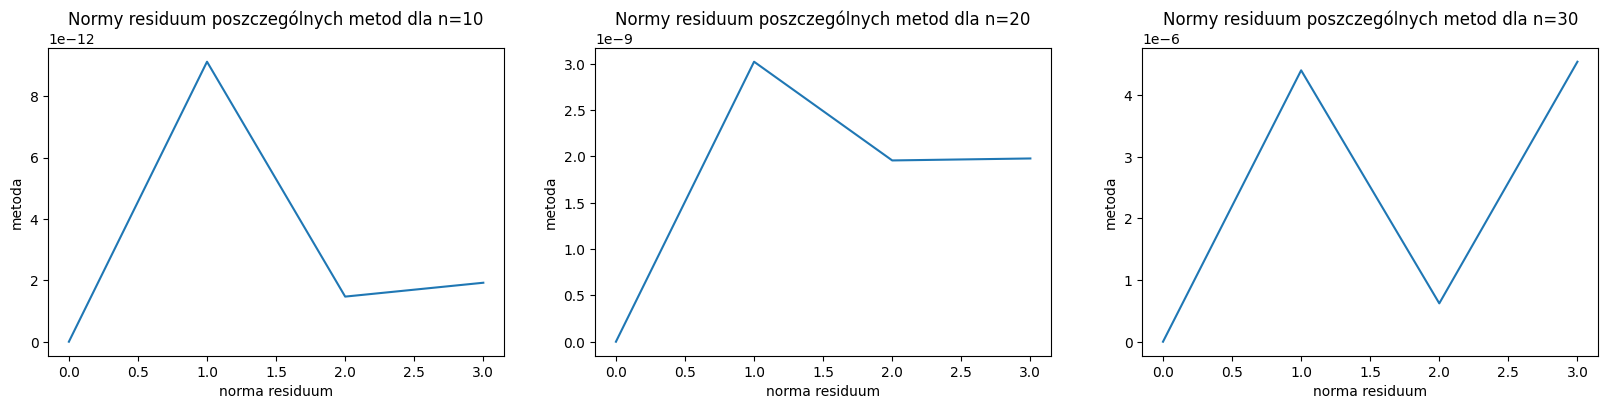

In [22]:
n = [10, 20, 30]
residuals = []
i = 0

for size in n:  
    wsp = np.logspace(1,size,size,base=2)
    # print(wsp)
    # print(A)
    P1 = np.random.rand(size, size) 
    while (not main.is_nonsingular(P1)):
        P1 = np.random.rand(size, size)
    
    Q, X = np.linalg.qr(P1)
    poly = main.polly_A(wsp.copy())[::-1]
    # print(poly)
    frob = frob_f(poly)
    # print(frob[0])
    A = np.diag(wsp.copy())  
    
    residuals.append([])
    residuals[i].append(np.linalg.norm(wsp - np.sort(np.linalg.eigvals(A))))
    residuals[i].append(np.linalg.norm(wsp- np.sort(np.linalg.eigvals(P1@A@np.linalg.inv(P1)))))
    residuals[i].append(np.linalg.norm(wsp - np.sort(np.linalg.eigvals(Q @ A @ Q.T))))
    residuals[i].append(np.linalg.norm(wsp - np.sort(np.linalg.eigvals(frob))))
    i += 1

fig, (n1,n2,n3) = plt.subplots(1,3,figsize=(20,4))
x = range(4)
n1.plot(x, residuals[0])
n1.set_xlabel('norma residuum')
n1.set_ylabel('metoda')
n1.set_title('Normy residuum poszczególnych metod dla n=10')

n2.plot(x, residuals[1])
n2.set_xlabel('norma residuum')
n2.set_ylabel('metoda')
n2.set_title('Normy residuum poszczególnych metod dla n=20')

n3.plot(x, residuals[2])
n3.set_xlabel('norma residuum')
n3.set_ylabel('metoda')
n3.set_title('Normy residuum poszczególnych metod dla n=30')
